# Sanitize (Fuel)

In [1]:
import pandas as pd
from zipfile import ZipFile
from matplotlib import pyplot as plt
%matplotlib inline
import base
from sanitize import extract_dataframe, extract_dataframes

In [2]:
extract_dataframe(ZipFile('data/20151201rtfuelmix_csv.zip'))

,Time Stamp,Time Zone,Fuel Category,Gen MWh
0,2015-12-09 00:05:00,EST,Dual Fuel,2809.0
1,2015-12-09 00:05:00,EST,Hydro,2224.0
2,2015-12-09 00:05:00,EST,Natural Gas,1903.0
3,2015-12-09 00:05:00,EST,Nuclear,4787.0
4,2015-12-09 00:05:00,EST,Other Fossil Fuels,125.0
5,2015-12-09 00:05:00,EST,Other Renewables,321.0
6,2015-12-09 00:05:00,EST,Wind,257.0
7,2015-12-09 00:10:00,EST,Dual Fuel,2782.0
8,2015-12-09 00:10:00,EST,Hydro,2055.0
9,2015-12-09 00:10:00,EST,Natural Gas,1877.0


In [3]:
df = extract_dataframes('data')

100%|██████████| 32/32 [00:06<00:00,  4.69zip file/s]


In [4]:
df.head()

,Fuel Category,Gen MW,Gen MWh,Time Stamp,Time Zone
0,Dual Fuel,NaN,2809.0,2015-12-09 00:05:00,EST
1,Hydro,NaN,2224.0,2015-12-09 00:05:00,EST
2,Natural Gas,NaN,1903.0,2015-12-09 00:05:00,EST
3,Nuclear,NaN,4787.0,2015-12-09 00:05:00,EST
4,Other Fossil Fuels,NaN,125.0,2015-12-09 00:05:00,EST


In [5]:
df.shape

(1904049, 5)

## Missing Values

In [6]:
df.isna().sum()

Fuel Category          0
Gen MW           1407350
Gen MWh           496699
Time Stamp             0
Time Zone              0
dtype: int64

In [7]:
left = 'Gen MWh'
right = 'Gen MW'
# merge the columns and delete the `right` one
df[left] = df[left].fillna(0) + df[right].fillna(0)
del df[right]

In [8]:
df.isna().sum()

Fuel Category    0
Gen MWh          0
Time Stamp       0
Time Zone        0
dtype: int64

## Sorting

In [9]:
df.sort_values(['Time Stamp', 'Fuel Category'], inplace=True)

## Cleaning

In [10]:
df = df.set_index('Time Stamp')
# we can assume that all the data in these sets are aligned in EST or EDT 
del df['Time Zone']

In [11]:
df.head()

,Fuel Category,Gen MWh
Time Stamp,,
2015-12-09 00:05:00,Dual Fuel,2809.0
2015-12-09 00:05:00,Hydro,2224.0
2015-12-09 00:05:00,Natural Gas,1903.0
2015-12-09 00:05:00,Nuclear,4787.0
2015-12-09 00:05:00,Other Fossil Fuels,125.0


In [12]:
df.tail()

,Fuel Category,Gen MWh
Time Stamp,,
2018-07-03 13:55:00,Natural Gas,5655.0
2018-07-03 13:55:00,Nuclear,5260.0
2018-07-03 13:55:00,Other Fossil Fuels,804.0
2018-07-03 13:55:00,Other Renewables,296.0
2018-07-03 13:55:00,Wind,15.0


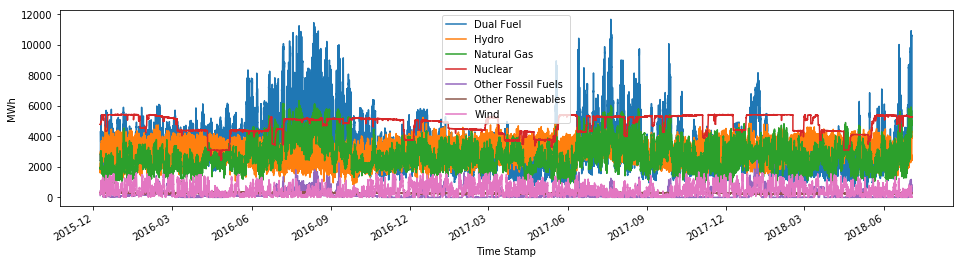

In [13]:
ax = df.groupby('Fuel Category')['Gen MWh'].plot(figsize=(16, 4), legend=True)
_ = plt.ylabel('MWh')

In [14]:
# the groups to use for groupby and their associated names
groups = [df.index.year, df.index.month, df.index.day, df.index.hour, 'Fuel Category']
groups_names = ['Year', 'Month', 'Day', 'Hour', 'Fuel Category']
# group the fuel data by time stamp and fuel category
mean_fuel = df.groupby(groups).mean()
mean_fuel.index.names = groups_names
mean_fuel = mean_fuel.reset_index()

In [15]:
mean_fuel.head()

,Year,Month,Day,Hour,Fuel Category,Gen MWh
0,2015,12,9,0,Dual Fuel,2645.272727
1,2015,12,9,0,Hydro,1854.181818
2,2015,12,9,0,Natural Gas,1918.000000
3,2015,12,9,0,Nuclear,4794.909091
4,2015,12,9,0,Other Fossil Fuels,155.909091


In [16]:
mean_fuel.tail()

,Year,Month,Day,Hour,Fuel Category,Gen MWh
157460,2018,7,3,13,Natural Gas,5635.500000
157461,2018,7,3,13,Nuclear,5266.416667
157462,2018,7,3,13,Other Fossil Fuels,682.250000
157463,2018,7,3,13,Other Renewables,299.583333
157464,2018,7,3,13,Wind,20.166667


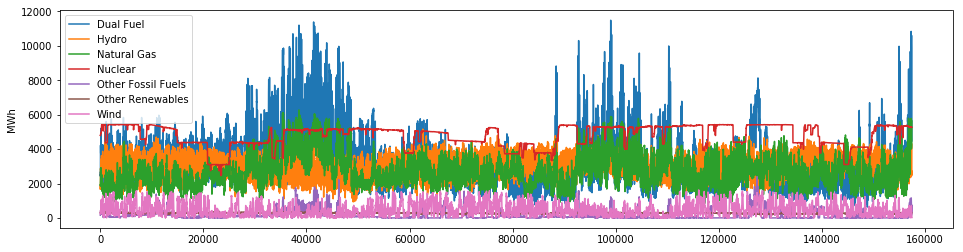

In [17]:
mean_fuel.groupby('Fuel Category')['Gen MWh'].plot(figsize=(16, 4), legend=True)
_ = plt.ylabel('MWh')

## One-Hot Matrix

In [18]:
# create a one hot matrix based on the fuel category classification
fuel_dummies = pd.get_dummies(mean_fuel, columns=['Fuel Category'], prefix='', prefix_sep='')
# iterate over the fuel category columns and multiply by the `Gen MWh` to turn the one hot into a 
# feature dataset
for column in fuel_dummies.columns[-7:]:
    fuel_dummies[column] = fuel_dummies['Gen MWh'] * fuel_dummies[column]
# remove the unnecessary `Gen MWh` category now that it is integrated in the one hot
del fuel_dummies['Gen MWh']

fuel_dummies.head(20)

,Year,Month,Day,Hour,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2015,12,9,0,2645.272727,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,2015,12,9,0,0.000000,1854.181818,0.00,0.000000,0.000000,0.000000,0.000000
2,2015,12,9,0,0.000000,0.000000,1918.00,0.000000,0.000000,0.000000,0.000000
3,2015,12,9,0,0.000000,0.000000,0.00,4794.909091,0.000000,0.000000,0.000000
4,2015,12,9,0,0.000000,0.000000,0.00,0.000000,155.909091,0.000000,0.000000
5,2015,12,9,0,0.000000,0.000000,0.00,0.000000,0.000000,316.363636,0.000000
6,2015,12,9,0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,268.818182
7,2015,12,9,1,2478.416667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
8,2015,12,9,1,0.000000,1661.000000,0.00,0.000000,0.000000,0.000000,0.000000
9,2015,12,9,1,0.000000,0.000000,1871.75,0.000000,0.000000,0.000000,0.000000


In [19]:
# aggregate the one hot entries based on the time stamp they occur at
fuel_dummies = fuel_dummies.groupby(['Year', 'Month', 'Day', 'Hour']).sum().reset_index()
fuel_dummies[fuel_dummies.columns[-7:]] = fuel_dummies[fuel_dummies.columns[-7:]].round().astype(int)
fuel_dummies.head()

,Year,Month,Day,Hour,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2015,12,9,0,2645,1854,1918,4795,156,316,269
1,2015,12,9,1,2478,1661,1872,4794,201,317,246
2,2015,12,9,2,2437,1767,1869,4793,203,313,220
3,2015,12,9,3,2523,1752,1962,4796,205,318,223
4,2015,12,9,4,2429,1898,2065,4794,204,316,235


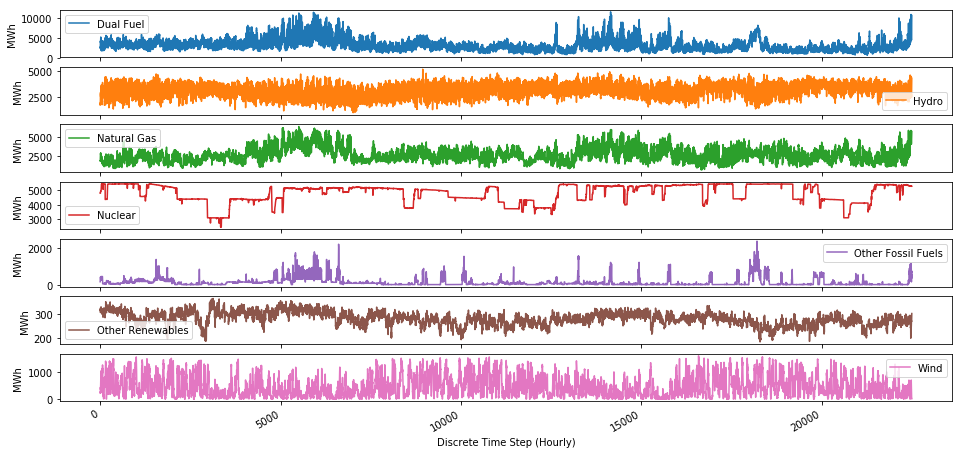

In [20]:
ax = fuel_dummies[fuel_dummies.columns[-7:]].plot(figsize=(16, 8), legend=True, subplots=True)
for _ax in ax:
    _ax.set_ylabel('MWh')
_ = plt.xlabel('Discrete Time Step (Hourly)')
plt.savefig('fuel.svg')
plt.savefig('fuel.pdf')

## Save

In [21]:
fuel_dummies.to_csv('dataset.gz', compression='gzip', index=None)

## Test

In [22]:
pd.read_csv('dataset.gz').head()

,Year,Month,Day,Hour,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2015,12,9,0,2645,1854,1918,4795,156,316,269
1,2015,12,9,1,2478,1661,1872,4794,201,317,246
2,2015,12,9,2,2437,1767,1869,4793,203,313,220
3,2015,12,9,3,2523,1752,1962,4796,205,318,223
4,2015,12,9,4,2429,1898,2065,4794,204,316,235
